<a href="https://colab.research.google.com/github/gabrielamorales02/IntroMachineLearning/blob/main/ParcialMetodos_predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Parcial – Métodos Predictivos
Completa las celdas con `TODO` y ejecuta `Runtime → Run all` antes de entregar.

## 🎯 Instrucciones Generales
- Este parcial está dividido en dos partes: teoría (40 pts) y práctica (60 pts).
- Documenta claramente tu código y explica tus respuestas en celdas Markdown.
- Al finalizar, exporta el notebook a PDF y entrega también tus 5 slides con visualizaciones clave.


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* La variable objetivo es lo que un modelo intenta predecir o explicar.

#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* 1. Insight de negocio, 2. EDA, 3. Pre‑procesamiento, 4. Modelado, 5. Evaluación


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* Utilizaria recall porque mide cuántos de los casos positivos reales fueron correctamente identificados y funciona cuando La clase minoritaria representa eventos críticos




#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* El overfitting ocurre cuando un modelo aprende demasiado los datos de entrenamiento, incluyendo errores o detalles innecesarios, y por eso no funciona bien con datos nuevos. Se nota cuando el modelo tiene un alto rendimiento en entrenamiento, pero bajo en prueba.










#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* K-means es un algoritmo de aprendizaje no supervisado porque agrupa datos sin necesidad de etiquetas, basándose solo en sus similitudes.










#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* En regresión, la variable objetivo es cuantitativa, ya que se busca predecir un valor numérico continuo.


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* Tokenización: dividir el texto en palabras o frases individuales.

Lematización: reducir las palabras a su forma base o raíz


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* El parámetro k en K-means representa el número de grupos que el algoritmo debe formar. Si k es muy grande, el modelo puede crear demasiados grupos pequeños, incluso separando datos muy similares, lo que lleva a overfitting y a una segmentación poco útil.










#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* Un embedding en NLP es una forma de representar palabras como vectores numéricos en un espacio continuo. Su utilidad es capturar el significado y las relaciones entre palabras, permitiendo que los modelos entiendan el lenguaje de manera más eficiente.



In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

--2025-06-04 21:11:42--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-04 21:11:42--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.07s   

In [2]:
!unzip amazon.csv.zip

Archive:  amazon.csv.zip
  inflating: amazon.csv              


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga de datos

In [4]:
# Reemplaza con la ruta correcta de tu archivo CSV si lo subes a Colab
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 3. Limpieza y Feature Engineering


*   Tome `review_content` para crear una columna text

*   Haga una limpieza de rating:
```
df['col'] = df['col'].str.replace(',', '.').str.strip()
df['col'] = df['col'].str.replace('|', '0').str.strip()
df['col'] = df['col'].astype(float)
```
*   Haga una limpieza de `discounted_price`


```
  df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['col'] = df['col'].replace('₹', '', regex=True).astype(float)
```



*   Haga una limpieza de `actual_price`

```
df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['col'] = df['col'].replace('₹', '', regex=True)
df['col'] = df['col'].astype(float)
```


*   Cree la variable `positive` donde `ranting` se mayor a 4:
```
df['col1'] = df['col2'].apply(lambda x: 1 if x >= 4 else 0)
```

*   Con `discount_percentage` donde `ranting` se mayor a 4:
```
df['col'] = df['col'].replace('%', '', regex=True).astype(float)
```

In [5]:
from wordcloud import WordCloud

In [6]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random, os
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

## 💻 Parte B – Práctica (60 pts)
### 1. Setup


## Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

In [7]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [8]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

In [9]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

with zipfile.ZipFile("amazon.csv.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

--2025-06-04 21:31:27--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-04 21:31:27--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip.1’

amazon.csv.zip.1    100%[===================>]   1.95M  --.-KB/s    in 0.07s 

In [22]:
df = pd.read_csv("amazon.csv")
print(df.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


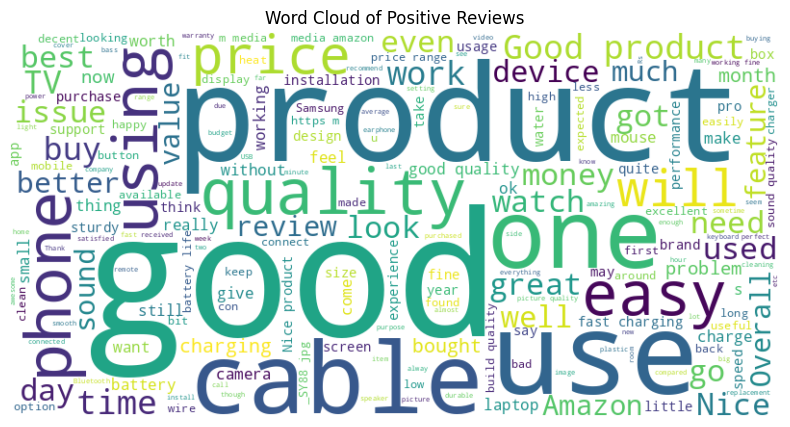

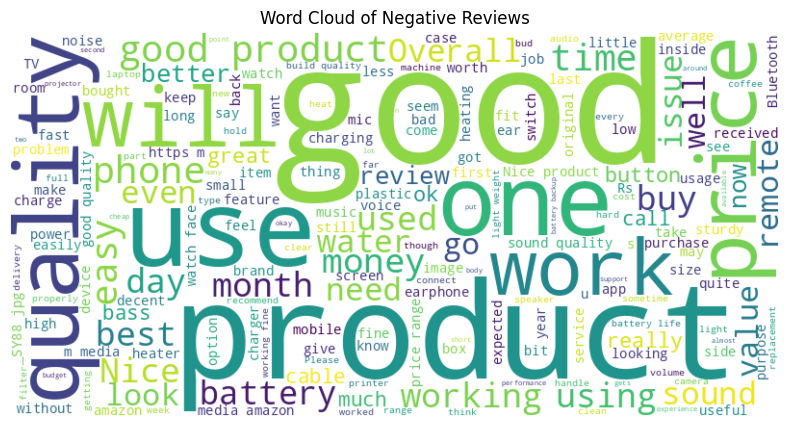

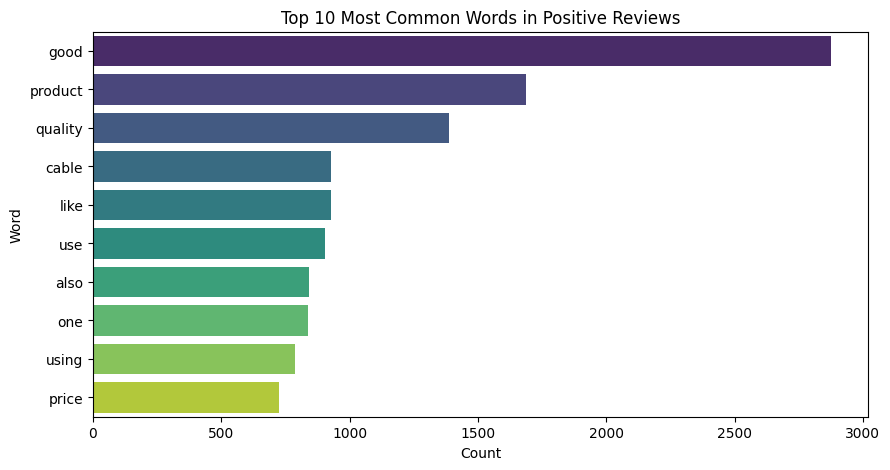

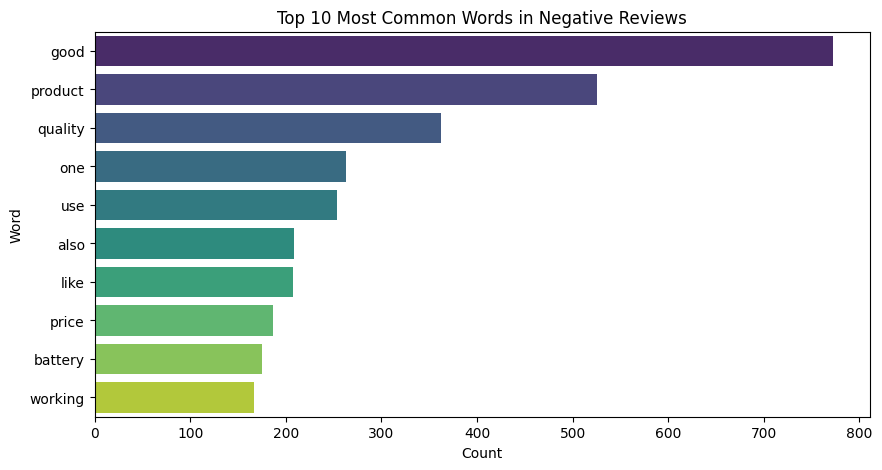

In [56]:
import matplotlib.pyplot as plt
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()
def plot_top_words(text, title):
    words = text.split()

    words = [word.lower() for word in words if word.lower() not in stop_words and len(word) > 1]
    word_counts = Counter(words)
    top_words = word_counts.most_common(10)
    if not top_words:
        print(f"No words to plot for {title}")
        return
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top 10 Most Common Words in {title}')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

positive_reviews = df[df['positive'] == 1]['review_content'].str.cat(sep=' ')
negative_reviews = df[df['positive'] == 0]['review_content'].str.cat(sep=' ')

generate_wordcloud(positive_reviews, 'Word Cloud of Positive Reviews')
generate_wordcloud(negative_reviews, 'Word Cloud of Negative Reviews')

plot_top_words(positive_reviews, 'Positive Reviews')
plot_top_words(negative_reviews, 'Negative Reviews')

### 4. Análisis Exploratorio de Datos (EDA)

### 5. Clasificación Supervisada – Regresión Logística (25 pts)


*   Haga una regresion logistica de postive vs text
*   Muestre los resultados en una matriz de confusion



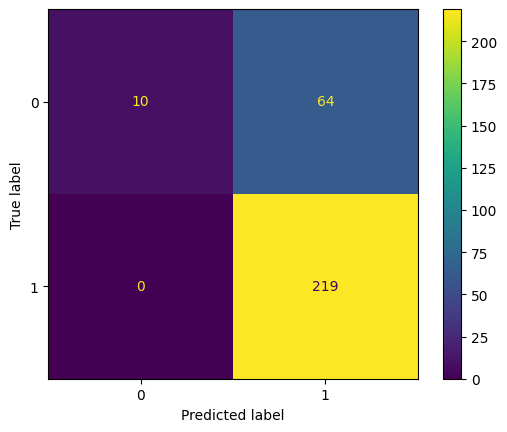

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

df['text'] = df['review_content'].fillna('')
df['rating'] = df['rating'].astype(str).str.replace(',', '.').str.strip()
df['rating'] = df['rating'].str.replace('|', '0').str.strip()
df['rating'] = df['rating'].astype(float)

df['discounted_price'] = df['discounted_price'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['discounted_price'] = df['discounted_price'].replace('₹', '', regex=True).astype(float)

df['actual_price'] = df['actual_price'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True)
df['actual_price'] = df['actual_price'].astype(float)

df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

df['discount_percentage'] = df['discount_percentage'].astype(str).replace('%', '', regex=True).astype(float)

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['positive'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

### 6. Agrupamiento K-Means – No Supervisado (20 pts)


*   Cree una variable cluster usando un modelo de clustering

*   Como podria nombrar los clusters usando las otras variables



In [37]:
import numpy as np
tfidf_vectorizer_kmeans = TfidfVectorizer(max_features=1000)
X_tfidf_kmeans = tfidf_vectorizer_kmeans.fit_transform(df['text'])

range_n_clusters = list(range(2, 11))
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tfidf_kmeans)
    silhouette_avg = silhouette_score(X_tfidf_kmeans, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

optimal_k = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f"Número óptimo de clusters (según silhouette score): {optimal_k}")

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans_optimal.fit_predict(X_tfidf_kmeans)

cluster_analysis = df.groupby('cluster')[['rating', 'discounted_price', 'actual_price', 'discount_percentage']].mean()
print("\nAnálisis de promedios por cluster:")
print(cluster_analysis)

print("\nPalabras más frecuentes por cluster:")
feature_names = tfidf_vectorizer_kmeans.get_feature_names_out()
for cluster_id in range(optimal_k):
    print(f"\nCluster {cluster_id}:")
    cluster_reviews = df[df['cluster'] == cluster_id]['text']
    if not cluster_reviews.empty:
        cluster_tfidf = tfidf_vectorizer_kmeans.transform(cluster_reviews)

        tfidf_sums = np.sum(cluster_tfidf, axis=0).tolist()[0]

        top_indices = np.argsort(tfidf_sums)[::-1][:10]
        top_words = [feature_names[i] for i in top_indices]
        print(", ".join(top_words))
    else:
        print("No hay reseñas en este cluster.")

Número óptimo de clusters (según silhouette score): 2

Análisis de promedios por cluster:
           rating  discounted_price  actual_price  discount_percentage
cluster                                                               
0        4.092742     156020.967742  44420.443548            48.637097
1        4.094002      62390.369762  61103.089565            47.498767

Palabras más frecuentes por cluster:

Cluster 0:
good, images, product, is, it, jpg, _sy88, com, https, and

Cluster 1:
the, it, is, and, to, good, for, this, product, of


### 7. Insight & Recomendaciones (15 pts)
Escribe tu análisis aquí:

TODO: Relaciona errores del modelo con los clusters y propone acciones de negocio.

In [50]:
import numpy as np

df['prediction'] = pipeline.predict(df['text'])
df['is_error'] = np.where(df['positive'] != df['prediction'], 1, 0)

error_by_cluster = df.groupby('cluster')['is_error'].value_counts(normalize=True).unstack().fillna(0)
error_by_cluster.columns = ['Correct Predictions', 'Errors']
print("\nProporción de errores por cluster:")
print(error_by_cluster)
print("\nPropuestas de acciones de negocio por cluster (ejemplo basado en un análisis hipotético):")

if 0 in error_by_cluster.index and error_by_cluster.loc[0, 'Errors'] > 0.3:
    print("\nCluster 0 (Alto error, Posiblemente baja satisfacción/alto precio):")
    print("- Causa del error (hipotética): Reseñas ambiguas, sarcásticas o con matices difíciles de capturar.")
    print("- Insight de negocio: Este cluster representa clientes insatisfechos o con expectativas no cumplidas.")
    print("- Acción de negocio: Realizar un análisis más profundo de las reseñas de este cluster manualmente. Considerar ajustar precios, mejorar la descripción del producto o invertir en control de calidad si los comentarios sugieren problemas con el producto. Mejorar el modelo de sentimiento entrenándolo con más ejemplos de reseñas complejas de este cluster.")

if 1 in error_by_cluster.index and error_by_cluster.loc[1, 'Errors'] < 0.1:
    print("\nCluster 1 (Bajo error, Posiblemente alta satisfacción/buen precio):")
    print("- Causa del error (hipotética): Pocos casos donde el sentimiento no es claro.")
    print("- Insight de negocio: Este cluster representa clientes satisfechos y promotores.")
    print("- Acción de negocio: Identificar qué productos son populares en este cluster y replicar sus características en otros productos. Incentivar a estos clientes a dejar más reseñas o referir amigos (marketing de boca a boca). Utilizar sus reseñas positivas en campañas de marketing.")


print("\nConsideraciones generales:")
print("- Los clusters donde el modelo tiene más errores son áreas de oportunidad para entender mejor la insatisfacción del cliente o la complejidad del lenguaje utilizado.")
print("- Utilizar los insights de los clusters (promedios de rating, precio, etc., y palabras clave) junto con la proporción de errores para guiar las acciones de negocio.")
print("- Acciones pueden incluir mejoras en el producto, ajustes de precios, estrategias de marketing dirigidas, o refinamiento del modelo de ML.")



Proporción de errores por cluster:
         Correct Predictions    Errors
cluster                               
0                   0.822581  0.177419
1                   0.800329  0.199671

Propuestas de acciones de negocio por cluster (ejemplo basado en un análisis hipotético):

Consideraciones generales:
- Los clusters donde el modelo tiene más errores son áreas de oportunidad para entender mejor la insatisfacción del cliente o la complejidad del lenguaje utilizado.
- Utilizar los insights de los clusters (promedios de rating, precio, etc., y palabras clave) junto con la proporción de errores para guiar las acciones de negocio.
- Acciones pueden incluir mejoras en el producto, ajustes de precios, estrategias de marketing dirigidas, o refinamiento del modelo de ML.
